# Problem 1.3

## Problem statement

Consider the **gaussian** distribution
$$ \rho(x) = A e^{-\lambda(x-a)^2}, $$
where $A$, $a$, and $\lambda$ are positive real constants.

1. use equation 1.16 to determine $A$.
2. Find $\langle x\rangle$, $\langle x^2\rangle$, and $\sigma$.
3. Sketch the graph of $\rho(x)$.

----

## Solution

Given values for $a$ and $\lambda$, we could pretty easily solve this numerically (and I'll add that at the end for the sake of completeness), but numerical solutions don't provide the same kind of insight that analytical ones do, so we're going the analytical route this time. Also, this is a problem that wouldn't be that hard to do by hand (you have to look up the integrals, but that's not a big deal) so it's a reasonable case for getting familiar with `sympy`'s quirks.

The first thing we need to do is let `sympy` know what we're using as mathematical symbols, so that it can distinguish between them and normal python variables. (`lambda` has a special use in creating anonymous functions, and I don't want to clobber that, so I'm using `lam` instead.)

In [1]:
from sympy import symbols, exp

A, a, lam = symbols('A a lambda', real=True, positive=True)
x = symbols('x')

rho = A*exp(-lam*(x-a)**2)

In [2]:
rho

A*exp(-lambda*(-a + x)**2)

A couple of notes here. First, since the problem specifies that $\lambda$, $A$, and $a$ are real and positive, I went ahead and told `sympy` about that when I declared them as symbols. Second, I didn't declare $\rho$ as a symbol, but I don't need to since I have assigned to it an expression consisting of symbols.

Lastly, while this works, I'd like to make it more readable (i.e., look more like what I recognize as math), so I'm going to use the pretty-printing feature.

In [3]:
import sympy as sp
sp.init_printing()

In [4]:
rho

Much better. Now, we want to use equation 1.16, $$1 = \int_{-\infty}^{+\infty}\rho(x) dx,$$ to get $A$. We can take the integral using `sympy` and take the reciprocal by hand:

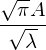

In [5]:
from sympy import integrate, oo

integrate(rho, (x, -oo, oo))

so $$A=\sqrt{\lambda\over\pi},$$
but this seems awkward. We'd really like `sympy` to do all of the work for us.  We can do this using the `sympy` function `solveset`. However, it's important to know that we **can't** use the `=` symbol to denote algebraic equality. We must instead use the `sympy` function `Eq`. (This is to make `sympy` play well with the rest of python.) 

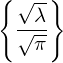

In [6]:
from sympy import Eq, solveset

solveset(Eq(1, integrate(rho, (x, -oo, oo))), A)

Okay, now we're equipped to get the expectation values for part (b). We do need, though, to modify $\rho(x)$ so that it includes the value we've found for $A$.

Once we do that, we use the definitions on page 10 for our expectation values.

In [7]:
# set rho equal to what it was, but substitute in the first element of the set of solutions to equation 1.19 for A
rho = rho.subs(A, next(iter(solveset(Eq(1, integrate(rho, (x, -oo, oo))), A))))

expectx = integrate(x*rho, (x, -oo, oo))
expectxsq = integrate(x**2*rho, (x, -oo, oo))

In [8]:
expectx

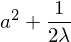

In [9]:
expectxsq

Remember that the definition in equation 1.19 is $\sigma^2$, and we want $\sigma$.

In [10]:
from sympy import sqrt
sigma = sqrt(expectxsq - expectx**2)

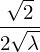

In [11]:
sigma

### Plotting

Plotting and sketching are two different things (with different aims), but we can use a couple of techniques to sketch by plotting.  The biggest difference is that you can sketch without choosing values for unknown constants, but that doesn't work for plotting. We need to choose values for $\lambda$ and $a$, and then see if we can generalize from the plots.

We'll start with $\lambda = 1$ and $a=0$.

To actually carry this out, I substitute values for $\lambda$ and $a$ into my expression for $\rho$ using `rho.subs`, and then use `lambdify` to turn it into a python function that can be used to generate a plot.

In [31]:
from sympy import lambdify

function_to_plot = lambdify(x, rho.subs({lam: 1, a:0}), "numpy")

I need to set up plotting in this notebook, and then choose a domain and plot.

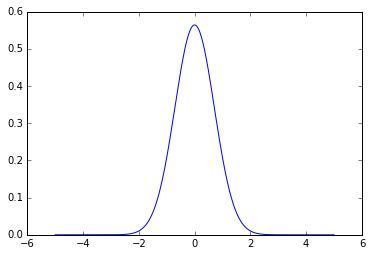

In [32]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

domain = np.arange(-5, 5, 0.001)
plt.plot(domain, function_to_plot(domain))

Okay, what happens if we vary $\lambda$? Let's choose some extreme values (10, 0.1) and plot.

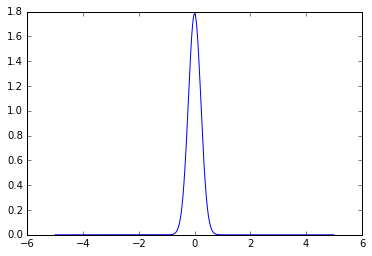

In [35]:
function_to_plot = lambdify(x, rho.subs({lam: 10, a:0}), "numpy")
plt.plot(domain, function_to_plot(domain))

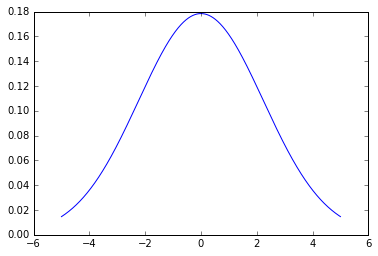

In [36]:
function_to_plot = lambdify(x, rho.subs({lam: 0.1, a:0}), "numpy")
plt.plot(domain, function_to_plot(domain))

So, $\lambda$ affects the width in an inverse way.  Let's take a look at $a$.

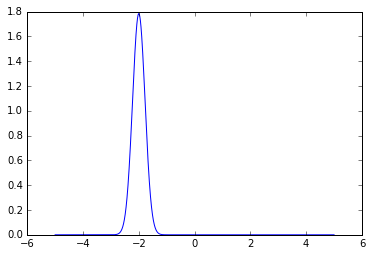

In [37]:
function_to_plot = lambdify(x, rho.subs({lam: 10, a:-2}), "numpy")
plt.plot(domain, function_to_plot(domain))

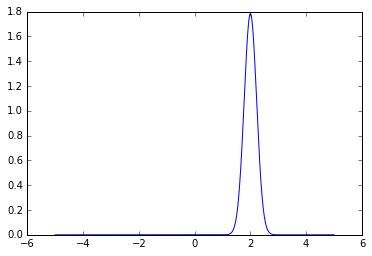

In [38]:
function_to_plot = lambdify(x, rho.subs({lam: 10, a:2}), "numpy")
plt.plot(domain, function_to_plot(domain))

It's pretty clear that $a$ localizes the peak.

As an aside, if I want my plots to look more like sketches, I can apply the `xkcd` style (based on the webcomic of the same name).

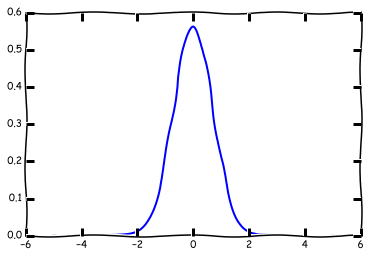

In [39]:
function_to_plot = lambdify(x, rho.subs({lam: 1, a:0}), "numpy")
with plt.xkcd():
    plt.plot(domain, function_to_plot(domain))

## Aside: Numerical solutions

I mentioned above that, given values for the constants, numerical solutions aren't that hard to compute. I'll illustrate that by computing the expectation value of x for $a=1$, $\lambda=1$. This is a two step process. First, you have to write a function that calculates the integrand (in this case, $x\rho(x)$. Then, you feed that function to the numeric integrator.

First, the function (written more for clarity than efficiency):

In [40]:
def integrand(x):
    """Integrand to find the expectation value of x for a gaussian distribution with lambda=1, a=1"""
    lam = 1.0
    a = 1.0
    A = np.sqrt(lam/np.pi)
    
    return x*A*np.exp(-lam*(x-a)**2)

Now, integrate it. We use the `scipy.integrate.quad` function (which stands for *quadrature*, another term for integration). This computes a definite integral, but will accept negative or positive infinity as limits.

In [42]:
from scipy.integrate import quad

quad(integrand, -np.inf, np.inf)

That's about as close to the analytic value as we could hope to get, but it's nowhere near as satisfying as taking the symbolic approach like we did above. Also, you'd have to do quite a few examples of $a$ and $\lambda$ before you could say with any confidence that $\langle x \rangle = a$.

----

## Portfolio references

## Index terms
* Gaussian
* Normalization
* Expectation value
* sympy
* plotting
* lambdify
* numerical integration

## Book references

* Equations 1.16--1.19, p. 10

## External references
* [Sympy tutorial](http://docs.sympy.org/latest/tutorial/index.html)
* [Extracting one element from a solveset](http://stackoverflow.com/questions/38418205/get-a-value-from-solution-set-returned-as-finiteset-by-sympy)